# Etude et simulation du modèle de Black-Scholes

Posons le modèle de Black-Scholes : 

$dS_t = rS_t dt + \sigma S_t dW_t $

Nous avons l'approximation d'**Euler-Maruyama** :

$S_{t+\Delta t} =S_t + r S_t dt + \sigma S_t \sqrt{dt} Z$

Avec  $Z \sim \mathcal{N}(0,1)$

Voici la modélisation des trajectoires avec ce modèle sous Python :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sk

In [2]:
S0 = 1000
r = .7
sigma = .4
T = 1
N = 365
M = 100
dt = T/N

S = np.zeros((M, N+1))
S[:,0]=S0

for t in range(1, N+1):
    Z = np.random.standard_normal(M)
    S[:, t] = S[:, t-1] + r * S[:, t-1]*dt + sigma * S[:, t-1] * np.sqrt(dt) * Z

In [3]:
ST = S[:, -1]
K = 1000

call_price= np.exp(-r*T)*np.mean(np.maximum(ST-K, 0))
put_price = np.exp(-r*T)*np.mean(np.maximum(K-ST, 0))
diff = call_price - put_price
print(f"Le prix d'un call approximé numériquement est : {call_price}")
print(f"Le prix d'un put approximé numériquement est : {put_price}")
print(f"La différence call-put est : {diff} ")

Le prix d'un call approximé numériquement est : 530.6467660313615
Le prix d'un put approximé numériquement est : 1.3936816177568137
La différence call-put est : 529.2530844136047 


## La représentation graphique de 100 trajectoires simulées par le modèle de Black-Scholes

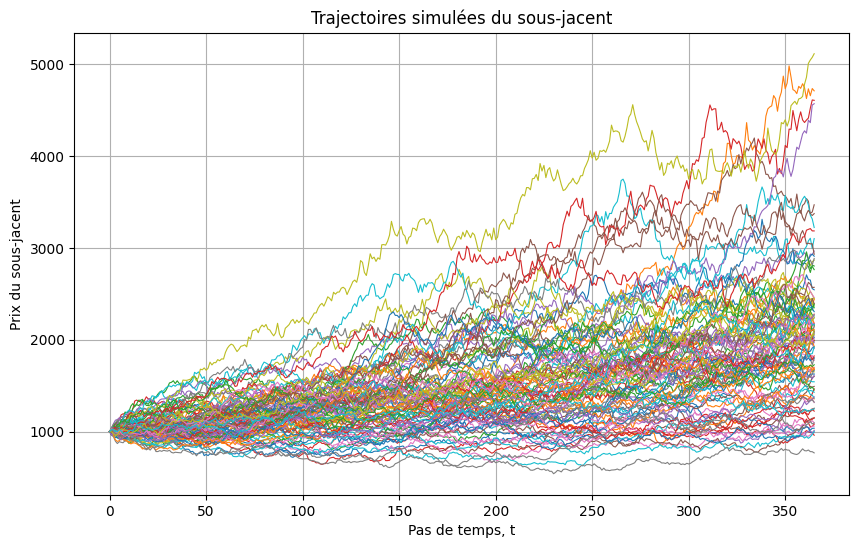

In [4]:
plt.figure(figsize=(10,6))
for i in range(M):
    plt.plot(S[i], lw = 0.8)
plt.title("Trajectoires simulées du sous-jacent")
plt.xlabel("Pas de temps, t")
plt.ylabel("Prix du sous-jacent")
plt.grid(True)
plt.show()

Visualisons la **moyenne de toutes les trajectoires**

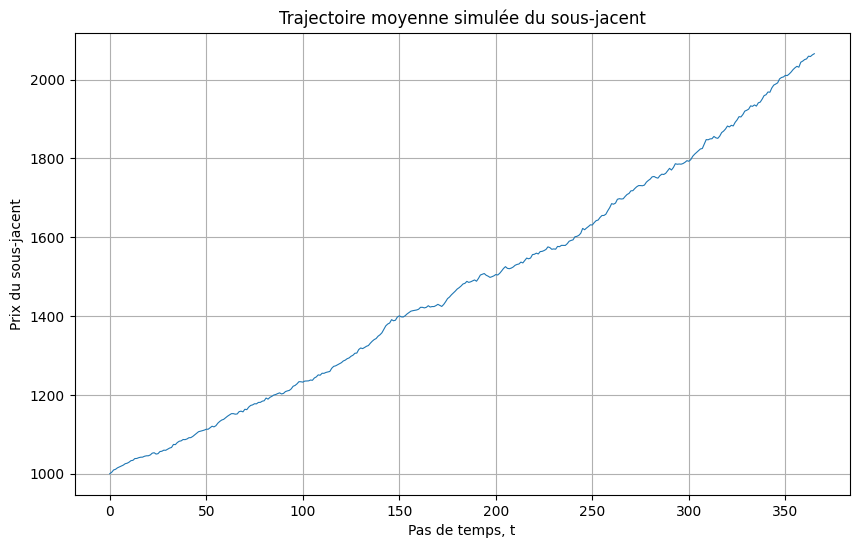

In [5]:
plt.figure(figsize=(10,6))
plt.plot(np.mean(S, axis=0), lw = 0.8)
plt.title("Trajectoire moyenne simulée du sous-jacent")
plt.xlabel("Pas de temps, t")
plt.ylabel("Prix du sous-jacent")
plt.grid(True)
plt.show()

## Visualisation des prix call/put en fonction de volatilité $\sigma$, $T$ et le taux sans risque $r$

Le prix analytique d'un call/put européen est : 

Posons $d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)T}{\sigma \sqrt{T}}$ et $d_2 = d_1 - \sigma \sqrt{T}$

$C(S_0, K, T, r, \sigma)= S_0\Phi(d_1) - Ke^{-rT}\Phi(d_2)$

$P(S_0, K, T, r, \sigma) = Ke^{-rT}\Phi(-d_2) - S_0\Phi(-d_1)$

### Visualisons les prix en fonction de la volatilité ($\sigma$)

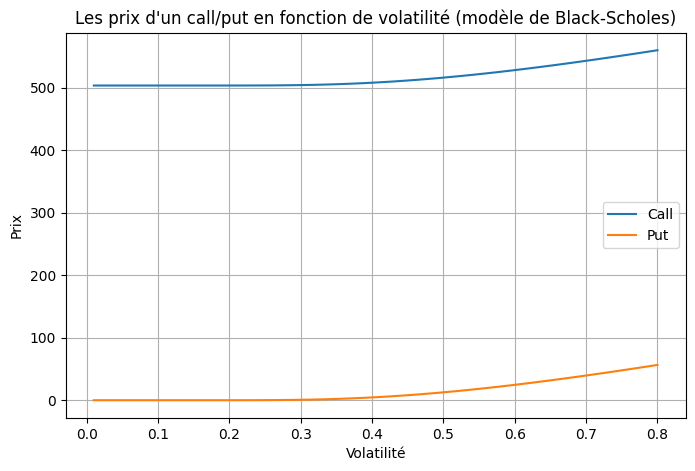

In [7]:
def b_s_call(Sc,Kc,Tc,rc,sc):
    d1=(np.log(Sc/Kc) + (rc + 0.5 * sc**2)*Tc)/ (sc * np.sqrt(Tc))
    d2 = d1 - sc*np.sqrt(Tc)
    return Sc*sk.norm.cdf(d1) - Kc* np.exp(-rc*Tc) * sk.norm.cdf(d2)

def b_s_put(Sp,Kp,Tp,rp,sp):
    d1=(np.log(Sp/Kp) + (rp + 0.5 * sp**2)*Tp)/ (sp* np.sqrt(Tp))
    d2 = d1 - sp*np.sqrt(Tp)
    return -Sp*sk.norm.cdf(-d1) + Kp * np.exp(-rp*Tp) * sk.norm.cdf(-d2)

s= np.linspace(0.01, 0.8, 100)
call_prices_sigma = [b_s_call(S0, K, T, r, sc) for sc in s ]
put_prices_sigma = [b_s_put(S0, K, T, r, sp) for sp in s ]

plt.figure(figsize=(8,5))
plt.plot(s, call_prices_sigma, label="Call")
plt.title("Les prix d'un call/put en fonction de volatilité (modèle de Black-Scholes)")
plt.plot(s, put_prices_sigma, label="Put")
plt.xlabel("Volatilité")
plt.ylabel("Prix")
plt.grid(True)
plt.legend()
plt.show()

Nous constatons que **les prix d'un call et d'un put augmentent avec la volatilité**

### Visualisation des prix Call/Put en fonction du taux sans risque

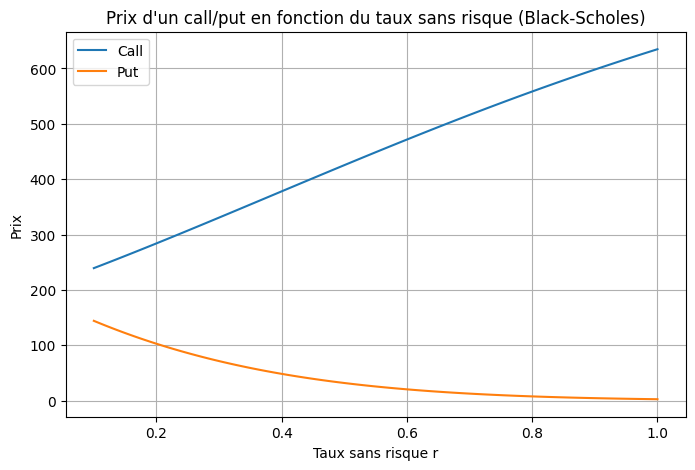

In [8]:
r1 = np.linspace(0.1, 1, 100)
sigma = 0.5
call_prices_risk = [b_s_call(S0, K, T, r_i, sigma) for r_i in r1]
put_prices_risk = [b_s_put(S0, K, T, r_i, sigma) for r_i in r1]

plt.figure(figsize=(8,5))
plt.plot(r1, call_prices_risk, label="Call")
plt.plot(r1, put_prices_risk, label="Put")
plt.title("Prix d'un call/put en fonction du taux sans risque (Black-Scholes)")
plt.xlabel("Taux sans risque r")
plt.ylabel("Prix")
plt.grid(True)
plt.legend()
plt.show()

Nous constatons que **le prix d'un call augmente avec le taux sans risque. Celui d'un put diminue**

### Visualisation des prix Call/Put en fonction de l'écheance

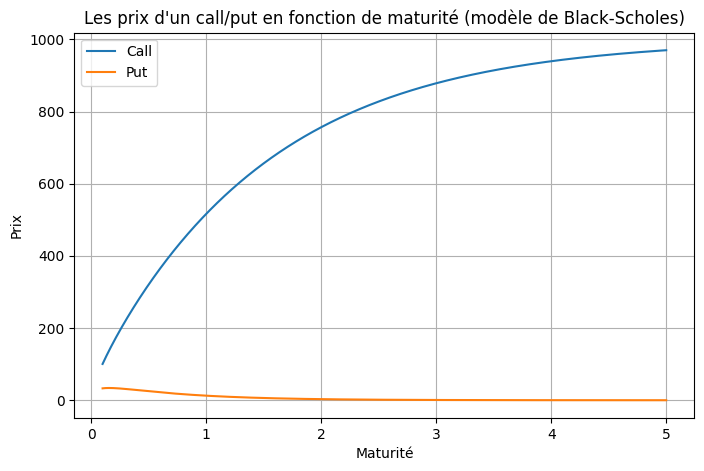

In [9]:
T= np.linspace(0.1, 5, 1000)
call_prices_time = [b_s_call(S0, K, T, r, sigma) for T in T ]
put_prices_time = [b_s_put(S0, K, T, r, sigma) for T in T ]

plt.figure(figsize=(8,5))
plt.plot(T, call_prices_time, label="Call")
plt.title("Les prix d'un call/put en fonction de maturité (modèle de Black-Scholes)")
plt.plot(T, put_prices_time, label="Put")
plt.xlabel("Maturité")
plt.ylabel("Prix")
plt.grid(True)
plt.legend()
plt.show()

Nous témoignons que **le prix d'un call augmente avec la maturité. Celui d'un put diminue**